In [70]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
url = 'https://api.census.gov/data/2017/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'
url2 = 'https://api.census.gov/data/2018/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'
url3 = 'https://api.census.gov/data/2019/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'
url4 = 'https://api.census.gov/data/2020/abscs?get=NAICS2017,NAICS2017_LABEL,EMP&for=us:*'

In [72]:
response = requests.get(url)
response2 = requests.get(url2)
response3 = requests.get(url3)
response4 = requests.get(url4)

In [73]:
data = response.json()
data2 = response2.json()
data3 = response3.json()
data4 = response4.json()

columns = data[0]
columns2 = data2[0]
columns3 = data3[0]
columns4 = data4[0]

df_2017 = pd.DataFrame(data[1:], columns = columns)
df_2018 = pd.DataFrame(data2[1:], columns = columns2)
df_2019 = pd.DataFrame(data3[1:], columns = columns3)
df_2020 = pd.DataFrame(data4[1:], columns = columns4)

In [74]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [75]:
df_2017 = df_2017[df_2017['NAICS2017'] == '44-45']
df_2017['Year'] = '2017'
df_2018 = df_2018[df_2018['NAICS2017'] == '44-45']
df_2018['Year'] = '2018'
df_2019 = df_2019[df_2019['NAICS2017'] == '44-45']
df_2019['Year'] = '2019'
df_2020 = df_2020[df_2020['NAICS2017'] == '44-45']
df_2020['Year'] = '2020'

In [76]:
c = pd.concat([df_2017,df_2018,df_2019, df_2020])

In [77]:
c

,NAICS2017,NAICS2017_LABEL,EMP,us,Year
796,44-45,Retail trade,15981504,1,2017
6,44-45,Retail trade,15875876,1,2018
41,44-45,Retail trade,15743993,1,2019
158,44-45,Retail trade,15918206,1,2020


In [78]:
c.rename(columns = { 'NAICS2017' : 'Industry Code',
                     'NAICS2017_LABEL' : 'Industry Name',
                     'EMP' : 'Number of Employees',
                    },
                        inplace = True)

In [79]:
convert_dict = {
                    'Number of Employees' : np.int64
                }

c = c.astype(convert_dict)

In [80]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 796 to 158
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Industry Code        4 non-null      object
 1   Industry Name        4 non-null      object
 2   Number of Employees  4 non-null      int64 
 3   us                   4 non-null      object
 4   Year                 4 non-null      object
dtypes: int64(1), object(4)
memory usage: 192.0+ bytes


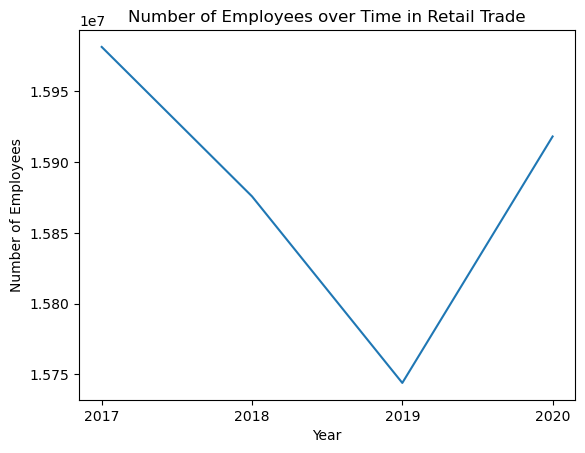

In [86]:
plt.plot(c['Year'], c['Number of Employees'])
plt.title('Number of Employees over Time in Retail Trade')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.show()